In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [84]:
# Set the working directory
import os
os.chdir('D:\\CHRIST\\Boot camp\\DATA')

In [85]:
# Load the required libraries
import warnings
warnings.filterwarnings("ignore")

In [86]:
# Read the CSV file
data = pd.read_csv("NSSO68.csv")

In [87]:
# Filter for JRKD
df = data[data['state_1'] == 'JRKD']

In [88]:
# Display dataset info
print("Dataset Information:")
print(df.info())
print(df.head())
print(df.shape)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 2740 entries, 3064 to 56446
Columns: 384 entries, slno to fv_tot
dtypes: float64(306), int64(76), object(2)
memory usage: 8.0+ MB
None
      slno                                 grp  Round_Centre  FSU_number  \
3064  3065  41499999999999994210549978103808.0             1       41471   
3065  3066  41499999999999994210549978103808.0             1       41471   
3066  3067  41499999999999994210549978103808.0             1       41471   
3067  3068  41499999999999994210549978103808.0             1       41471   
3068  3069  41499999999999994210549978103808.0             1       41471   

      Round  Schedule_Number  Sample  Sector  state  State_Region  ...  \
3064     68               10       1       2     20           202  ...   
3065     68               10       1       2     20           202  ...   
3066     68               10       1       2     20           202  ...   
3067     68               10       1       2  

In [89]:
# Find missing values
missing_info = df.isna().sum()
print("Missing Values Information:")
print(missing_info)

Missing Values Information:
slno              0
grp               0
Round_Centre      0
FSU_number        0
Round             0
                 ..
foodtotal_q       0
state_1           0
Region            0
fruits_df_tt_v    0
fv_tot            0
Length: 384, dtype: int64


In [90]:
# Subset the data
jrkdnew = df[['state_1', 'District', 'Region', 'Sector', 'State_Region', 'Meals_Employer', 'Meals_Payment', 'Meals_At_Home', 'ricepds_v', 'Wheatpds_q', 'chicken_q', 'pulsep_q', 'wheatos_q', 'No_of_Meals_per_day']]

In [91]:
# Check for missing values in the subset
print("Missing Values in Subset:")
print(jrkdnew.isna().sum())

Missing Values in Subset:
state_1                  0
District                 0
Region                   0
Sector                   0
State_Region             0
Meals_Employer         946
Meals_Payment          899
Meals_At_Home            6
ricepds_v                0
Wheatpds_q               0
chicken_q                0
pulsep_q                 0
wheatos_q                0
No_of_Meals_per_day      0
dtype: int64


In [92]:
# Impute missing values with mean for specific columns
jrkdnew['Meals_At_Home'].fillna(jrkdnew['Meals_At_Home'].mean(), inplace=True)
jrkdnew['Meals_Employer'].fillna(jrkdnew['Meals_Employer'].mean(), inplace=True)
jrkdnew['Meals_Payment'].fillna(jrkdnew['Meals_Payment'].mean(), inplace=True)

In [93]:
# Check for missing values after imputation
print("Missing Values After Imputation:")
print(jrkdnew.isna().sum())

Missing Values After Imputation:
state_1                0
District               0
Region                 0
Sector                 0
State_Region           0
Meals_Employer         0
Meals_Payment          0
Meals_At_Home          0
ricepds_v              0
Wheatpds_q             0
chicken_q              0
pulsep_q               0
wheatos_q              0
No_of_Meals_per_day    0
dtype: int64


In [94]:
# Remove outliers
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_threshold = Q1 - (1.5 * IQR)
    upper_threshold = Q3 + (1.5 * IQR)
    df = df[(df[column_name] >= lower_threshold) & (df[column_name] <= upper_threshold)]
    return df

outlier_columns = ['ricepds_v', 'chicken_q']
for col in outlier_columns:
    jrkdnew = remove_outliers(jrkdnew, col)

In [95]:
# Summarize consumption
jrkdnew['total_consumption'] = jrkdnew[['ricepds_v', 'Wheatpds_q', 'chicken_q', 'pulsep_q', 'wheatos_q']].sum(axis=1)

In [96]:
# Summarize and display top and bottom consuming districts and regions
def summarize_consumption(group_col):
    summary = jrkdnew.groupby(group_col)['total_consumption'].sum().reset_index()
    summary = summary.sort_values('total_consumption', ascending=False)
    return summary

district_summary = summarize_consumption('District')
region_summary = summarize_consumption('Region')

print("Top 3 Consuming Districts:")
print(district_summary.head(3))
print("Bottom 3 Consuming Districts:")
print(district_summary.tail(3))

print("Region Consumption Summary:")
print(region_summary)

Top 3 Consuming Districts:
    District  total_consumption
12        13         761.551502
11        12         756.297160
3          4         656.737734
Bottom 3 Consuming Districts:
    District  total_consumption
14        15         175.560577
15        16         152.379365
19        20         128.894048
Region Consumption Summary:
   Region  total_consumption
1       2        5805.038361
0       1        2760.813772


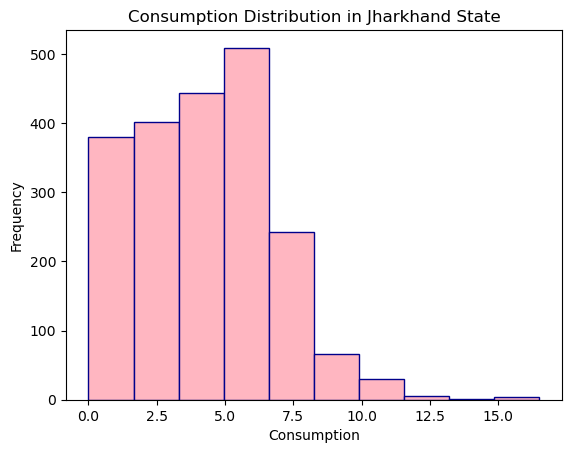

In [97]:
# Plot the consumption distribution
plt.hist(jrkdnew['total_consumption'], bins=10, color='LightPink', edgecolor='DarkBlue')
plt.xlabel('Consumption')
plt.ylabel('Frequency')
plt.title('Consumption Distribution in Jharkhand State')
plt.show()

In [98]:
# Check the unique values in the 'District' column before mapping
print("Unique Values in 'District' Column Before Mapping:")
print(jrkdnew['District'].unique())

Unique Values in 'District' Column Before Mapping:
[21 22 20 19 18 14 17 16 15 13  4  1  3  2  5 11 12 10  9  8  6  7]


In [99]:
# Check the data type of the 'District' column
print("Data Type of 'District' Column:", jrkdnew['District'].dtype)

Data Type of 'District' Column: int64


In [100]:
# Define district and sector mappings
district_mapping = {
    "1": "Garhwa", "2": "Palamu", "3": "Chatra", "4": "Hazaribagh", "5": "Kodarma", "6": "Giridih",
    "7": "Dcoghar", "8": "Godda", "9": "Sahibganj", "10": "Pakaur", "11": "Dumka", "12": "Dhanbad",
    "13": "Bokaro", "14": "Ranchi", "15": "Lohardaga", "16": "Gumla", "17": "Pashchimi Singhbhum",
    "18": "Parbi Singhbhum", "19": "Latchar", "20": "Simdega", "21": "Jamtara", "22": "Seraikela-kharsawan"
}

sector_mapping = {"2": "URBAN", "1": "RURAL"}

In [101]:
# Compare the unique values in 'District' with the mapping keys
original_districts = jrkdnew['District'].unique()
mapping_keys = district_mapping.keys()
print(f"Original Districts: {original_districts}")
print(f"Mapping Keys: {mapping_keys}")

Original Districts: [21 22 20 19 18 14 17 16 15 13  4  1  3  2  5 11 12 10  9  8  6  7]
Mapping Keys: dict_keys(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22'])


In [102]:
# Ensure 'District' and 'Sector' are string types before mapping
jrkdnew['District'] = jrkdnew['District'].astype(str)
jrkdnew['Sector'] = jrkdnew['Sector'].astype(str)

In [103]:
# Apply the mapping
jrkdnew['District'] = jrkdnew['District'].map(district_mapping)
jrkdnew['Sector'] = jrkdnew['Sector'].map(sector_mapping)

In [104]:
# Check the unique values in the 'District' column after mapping
print("Unique Values in 'District' Column After Mapping:")
print(jrkdnew['District'].unique())

Unique Values in 'District' Column After Mapping:
['Jamtara' 'Seraikela-kharsawan' 'Simdega' 'Latchar' 'Parbi Singhbhum'
 'Ranchi' 'Pashchimi Singhbhum' 'Gumla' 'Lohardaga' 'Bokaro' 'Hazaribagh'
 'Garhwa' 'Chatra' 'Palamu' 'Kodarma' 'Dumka' 'Dhanbad' 'Pakaur'
 'Sahibganj' 'Godda' 'Giridih' 'Dcoghar']


In [105]:
# Calculate total consumption
jrkdnew['total_consumption'] = jrkdnew[['ricepds_v', 'Wheatpds_q', 'chicken_q', 'pulsep_q', 'wheatos_q']].sum(axis=1)
print("Data with Total Consumption:")
print(jrkdnew[['District', 'total_consumption']].head())

Data with Total Consumption:
     District  total_consumption
3064  Jamtara           7.000000
3065  Jamtara           4.285714
3066  Jamtara           5.125000
3067  Jamtara           5.166667
3068  Jamtara           6.200000


In [106]:
# Aggregate total consumption by district
JRKD_consumption = jrkdnew.groupby('District')['total_consumption'].sum().reset_index()
print("Aggregated Total Consumption by District:")
print(JRKD_consumption)

Aggregated Total Consumption by District:
               District  total_consumption
0                Bokaro         761.551502
1                Chatra         371.003356
2               Dcoghar         552.164103
3               Dhanbad         756.297160
4                 Dumka         421.579968
5                Garhwa         342.991190
6               Giridih         518.365841
7                 Godda         468.921429
8                 Gumla         152.379365
9            Hazaribagh         656.737734
10              Jamtara         388.276190
11              Kodarma         355.034530
12              Latchar         232.005119
13            Lohardaga         175.560577
14               Pakaur         283.666667
15               Palamu         356.037224
16      Parbi Singhbhum         562.169228
17  Pashchimi Singhbhum         176.236905
18               Ranchi         437.365116
19            Sahibganj         271.439881
20  Seraikela-kharsawan         197.175000
21          

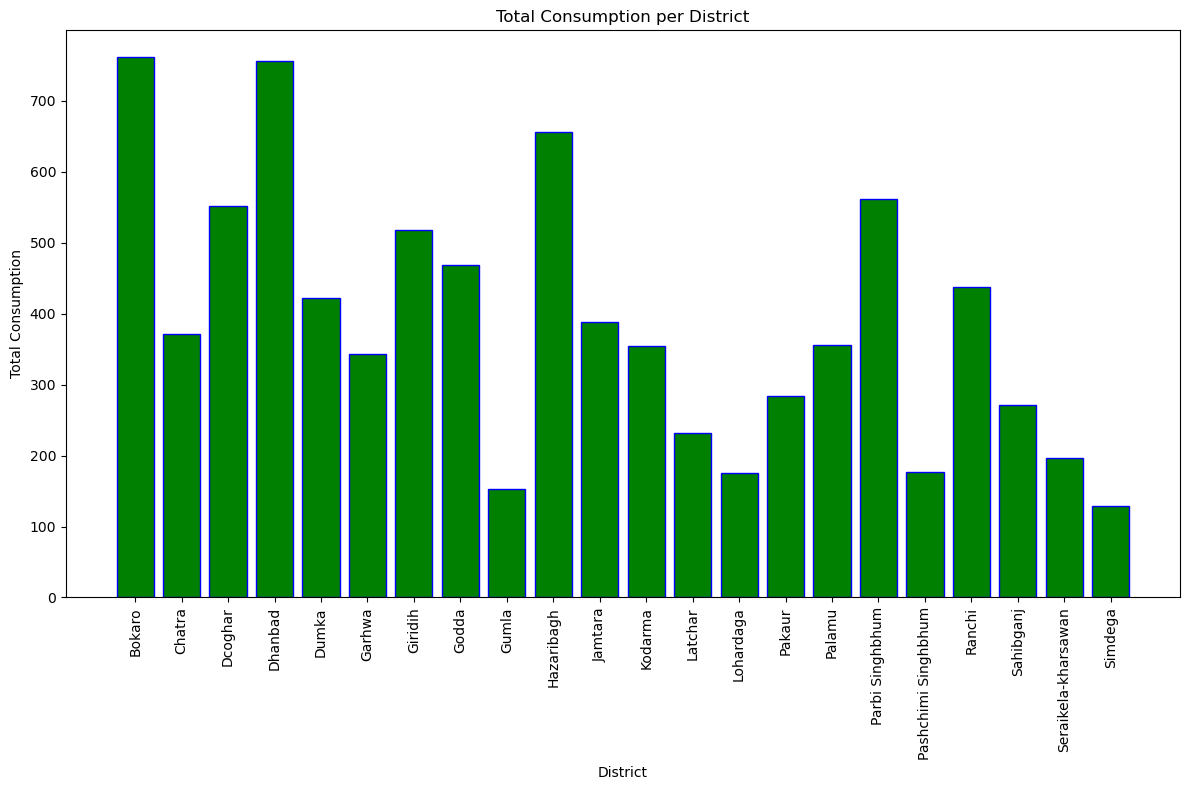

In [107]:
# Bar plot of total consumption by district using matplotlib
plt.figure(figsize=(12, 8))
plt.bar(range(len(JRKD_consumption)), JRKD_consumption['total_consumption'], color='Green', edgecolor='Blue')
plt.xlabel('District')
plt.ylabel('Total Consumption')
plt.title('Total Consumption per District')
plt.xticks(range(len(JRKD_consumption)), JRKD_consumption['District'], rotation=90, ha='center')
plt.tight_layout()
plt.show()

In [108]:
# b) Plotting 'total consumption' on the Jharkhand state map using NSSO68.csv data

In [109]:
# Read the GeoJSON file
data_map = gpd.read_file("D:\\CHRIST\\Boot camp\\DATA\\JHARKHAND_DISTRICTS.geojson")

In [111]:
# Rename the district column to match with the data
data_map = data_map.rename(columns={'dtname': 'District'})

In [112]:
# Merge the map data with the consumption data
data_map_data = data_map.merge(JRKD_consumption, on='District')

<Figure size 1200x800 with 0 Axes>

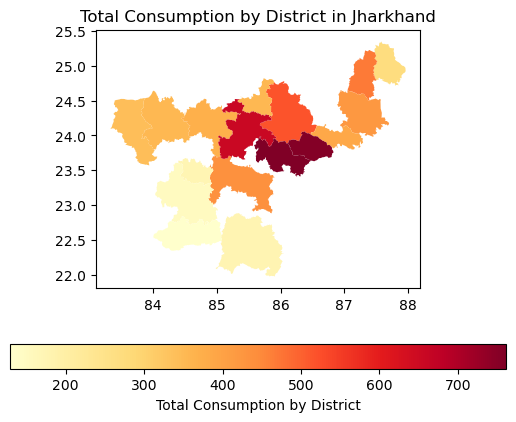

In [113]:
# Plotting the map
plt.figure(figsize=(12, 8))
data_map_data.plot(column='total_consumption', cmap='YlOrRd', legend=True,
                   legend_kwds={'label': "Total Consumption by District",
                                'orientation': "horizontal"})
plt.title("Total Consumption by District in Jharkhand")
plt.show()

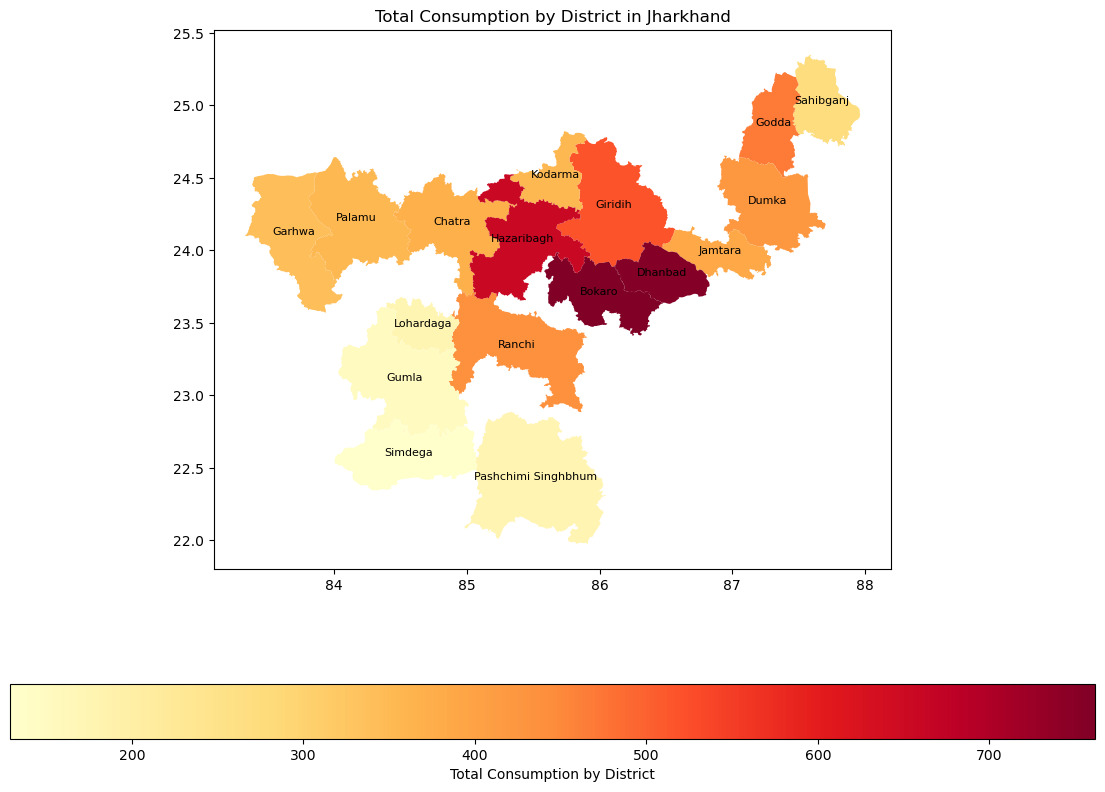

In [115]:
# Adding labels to the map
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
data_map_data.plot(column='total_consumption', cmap='YlOrRd', legend=True,
                   legend_kwds={'label': "Total Consumption by District",
                                'orientation': "horizontal"}, ax=ax)
data_map_data.apply(lambda x: ax.annotate(text=x['District'], xy=x.geometry.centroid.coords[0], ha='center', fontsize=8), axis=1)
plt.title("Total Consumption by District in Jharkhand")
plt.show()